In [3]:
# Import calibration functions
# Run this to reimport without having to restart the whole notebook
import radial_velocity_functions
import importlib
importlib.reload(radial_velocity_functions)
from radial_velocity_functions import *

1086 peaks found
1041 peaks found
78 matches found
0 / 78 fits failed


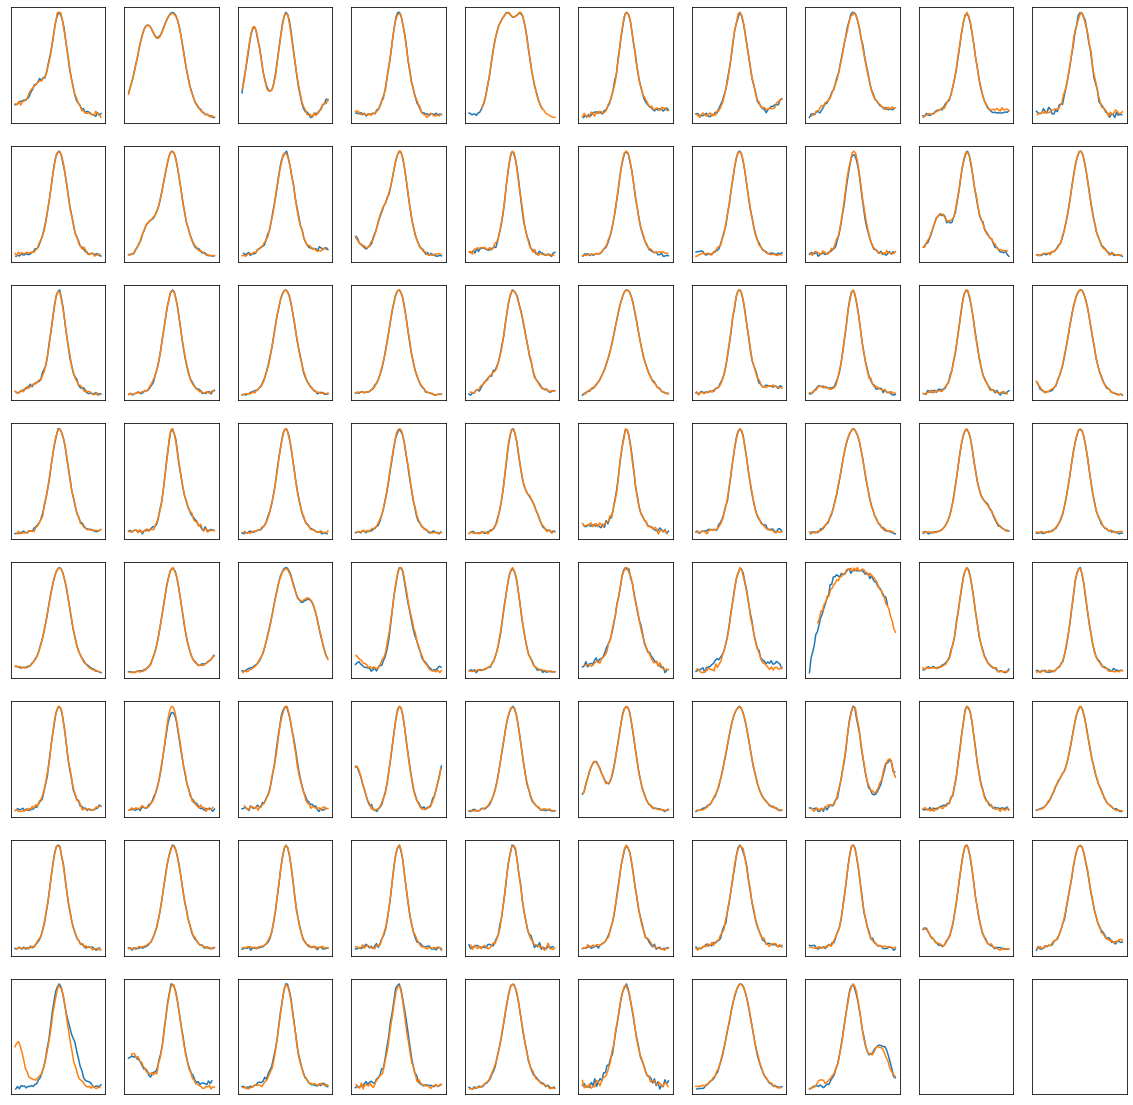

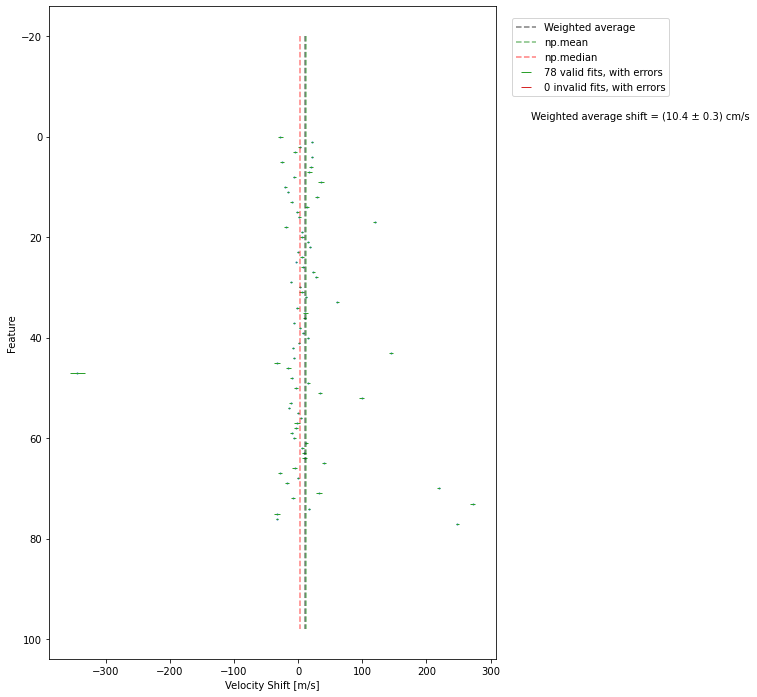

In [5]:
shifts = analyse_and_plot_shifts(SPECTRA_PATH_34411, 0, 21, bary=False)

In [143]:
s, s_err, s_valid = np.asarray(shifts[:, 0]), np.asarray(shifts[:, 1]), np.asarray(shifts[:, 2])



In [210]:
minuits = shifts[:, 3]
k = minuits[49]
k.fmin.has_parameters_at_limit

# k.draw_profile("A")


# k.fmin.has_made_posdef_covar

# k.draw_mnprofile("A")



True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm as tqdm
from tqdm import tqdm
import pandas as pd
from datetime import datetime
from scipy.interpolate import interp1d

# plt styles
matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"
matplotlib.rcParams["font.size"] = 10 
matplotlib.rcParams['figure.dpi'] = 100

from os import walk

In [40]:

filenames = get_spectra_filenames_without_duplicate_dates(SPECTRA_PATH_51PEG)
file1, file2 = filenames[1], filenames[8]
matches = find_feature_matches(find_features(file1), find_features(file2))
shifts = compute_all_feature_shifts(matches, plot=False, fix_errors=True)


2888 peaks found
2824 peaks found
101 matches found
0 / 101 fits failed


In [9]:
def fit_straight_line(x, y, y_err, init_value, plot=True):
    
    if plot:
        fig, ax = plt.subplots(figsize=(8, 4))
        ax.errorbar(x, y, yerr=y_err, fmt=".", color="k")

    # Fitting functions:
    def func(x, a) :
        return a + x * 0 # have to include x for numpy to work....

    # ChiSquare fit model:
    def model_chi(a) :
        y_fit = func(x, a)
        chi2 = np.sum(((y - y_fit) / y_err)**2)
        return chi2
    model_chi.errordef = 1

    minuit = Minuit(model_chi, a=init_value)
    m = minuit.migrad()        

    a, a_err = minuit.values['a'], minuit.errors['a']

    # Plot result
    if plot:
        xPeak = np.linspace(x[0], x[-1], 100)
        ax.plot(xPeak, func(xPeak, *minuit.values[:]), '-r')
        ax.set_xlabel("x")
        ax.set_ylabel("y")

        Npoints = len(x)
        Nvar = 1                                        # Number of variables
        Ndof_fit = Npoints - Nvar                       # Number of degrees of freedom = Number of data points - Number of variables
        Chi2_fit = minuit.fval                          # The chi2 value
        Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)    # The chi2 probability given N degrees of freedom

        d = {'a':   [a, a_err],
            'Chi2':     Chi2_fit,
            'ndf':      Ndof_fit,
            'Prob':     Prob_fit,
            'f(x)=':    "a"
        }

        text = nice_string_output(d, extra_spacing=2, decimals=5)
        add_text_to_ax(0.62, 0.95, text, ax, fontsize=14, color='r')
    
    return a, m


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.563e+07                  │              Nfcn = 13               │
│ EDM = 1.25e-12 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -35.41   │   0.34    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     a │
├───┼───────┤
│ a │ 0.117 │
└───┴───────┘

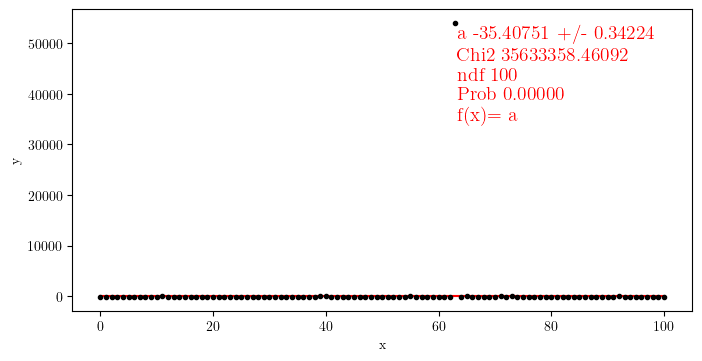

In [41]:
y, y_err = shifts[:, 0], shifts[:, 1]
c = 299792458
y, y_err = y * c, y_err * c

x = np.arange(len(y))
a, m = fit_straight_line(x, y, y_err, np.mean(y), plot=True)
m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8028                       │              Nfcn = 13               │
│ EDM = 2.43e-20 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  -112.59  │   0.34    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────┐
│   │     a │
├───┼───────┤
│ a │ 0.117 │
└───┴───────┘

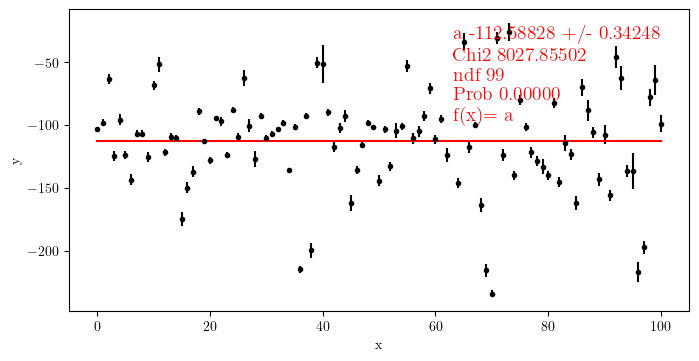

In [11]:
a, m = fit_straight_line(x[y < 20000], y[y < 20000], y_err[y < 20000], np.mean(y[y < 20000]), plot=True)
m

### Ztest

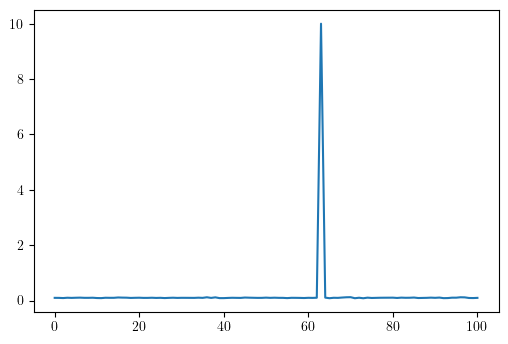

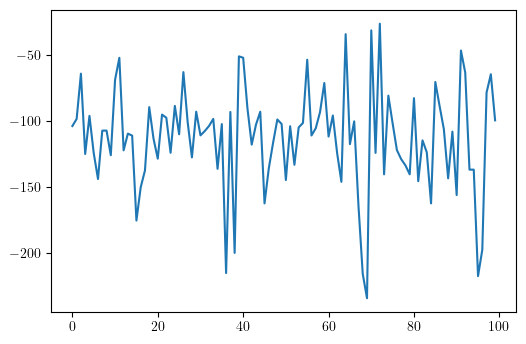

In [59]:
data = {
    'x':    x,
    'y':    y,
    'y_err': y_err,
    }
df = pd.DataFrame(data)

mean = np.mean(df["y"])
std = np.std(df["y"])
z = np.abs(df["y"] - mean)/std

plt.plot(z)

# Now we can sort by z
plt.figure()
plt.plot(y[z < 5])


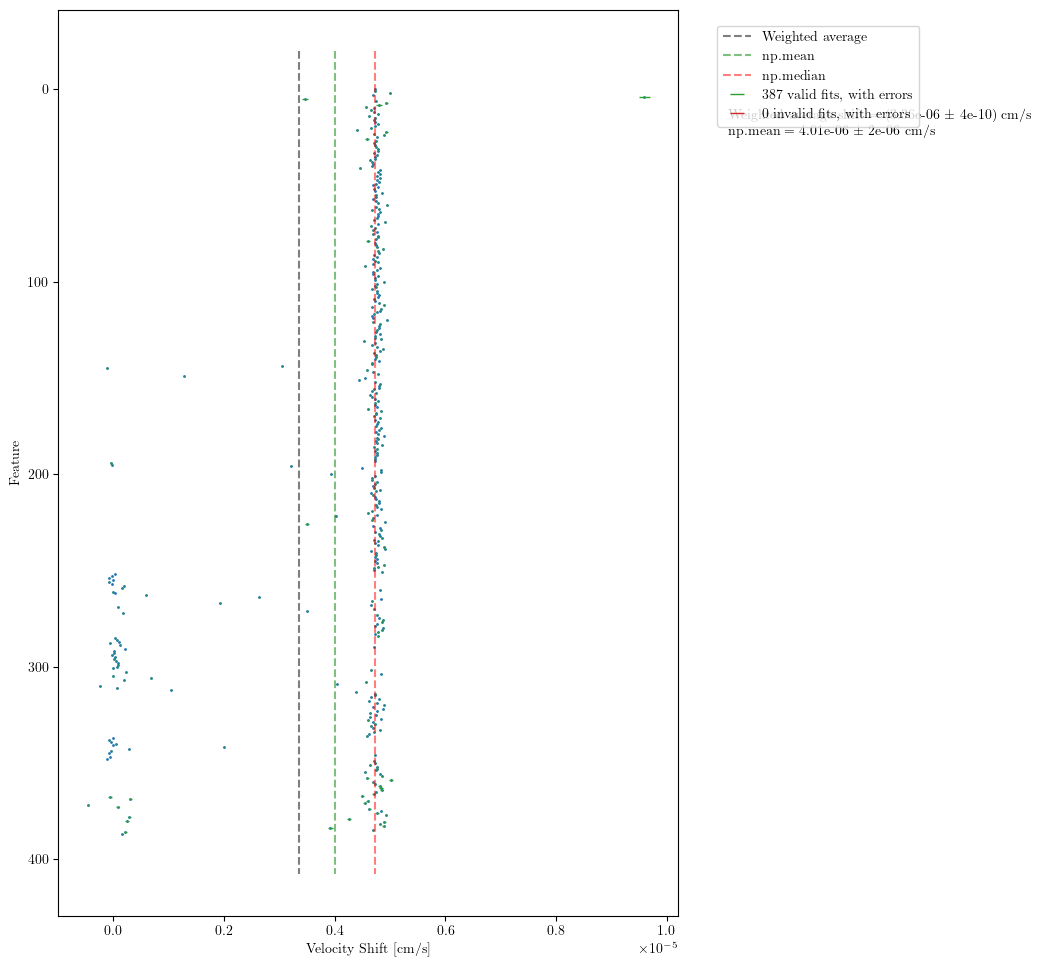

In [104]:
result, coords = np.load("lily_data_results/all_features_34411_angstrom_non_bary_doppler_fix.npy", allow_pickle=True)
plot_features_shift(filter_z_test(result[43], set_to_nan=True))



/Users/jakobharteg/GitHub/bachelor-project/radial_velocity_functions.py:737: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  shift_mean, shift_mean_err = weighted_mean(shifts_list[shifts_valid_list == 1], shifts_err_list[[shifts_valid_list == 1]])


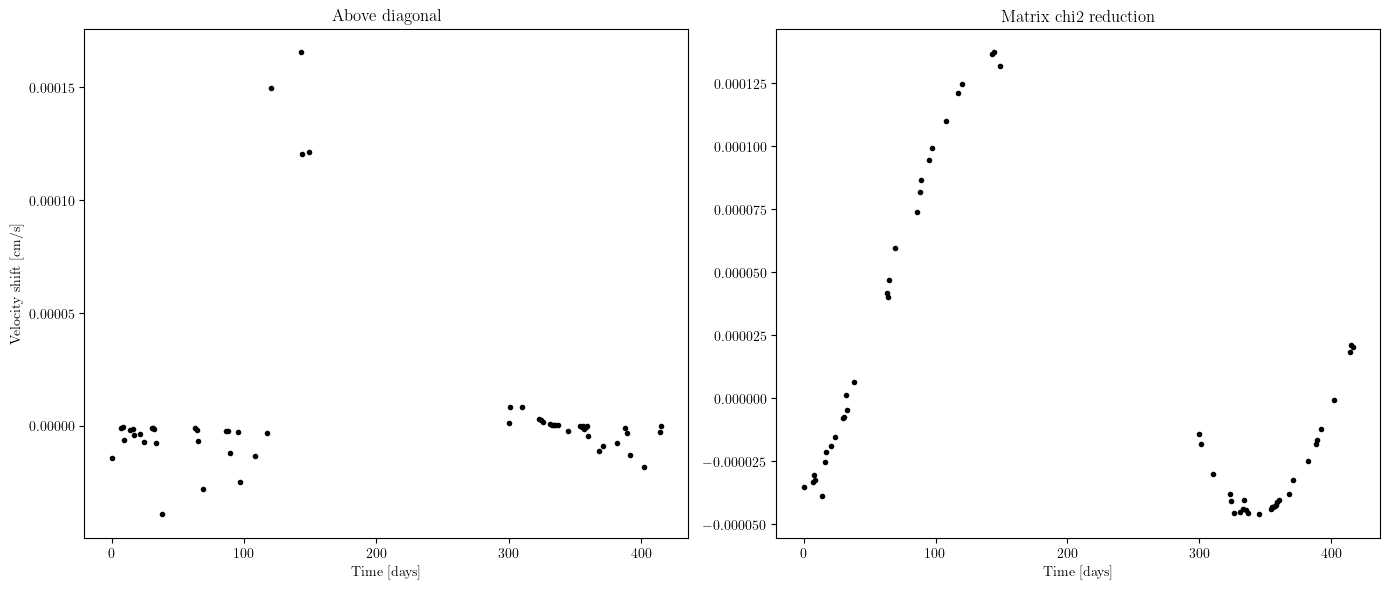

In [106]:
file = "lily_data_results/all_features_34411_angstrom_non_bary_doppler_fix.npy"
result, coords = np.load(file, allow_pickle=True)
result = filter_z_test_result(result)
# plot_matrix(*parse_matrix_results(result, coords), plot_ratio=False)
m, final_shifts, final_shifts_err = matrix_reduce_results_file(file, plot=True)